<a href="https://colab.research.google.com/github/oyane806/lets-stop-wildfires-hackathon/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!gdown https://drive.google.com/uc?id=1FfZqzTNGwGnI_XEKlqqdPEmETSGhpQW_

Downloading...
From: https://drive.google.com/uc?id=1FfZqzTNGwGnI_XEKlqqdPEmETSGhpQW_
To: /content/test.zip
112MB [00:00, 217MB/s] 


In [0]:
!unzip test.zip

In [6]:
ls

gdrive/  __MACOSX/  sample_data/  test/  test.zip


In [0]:
import os
import pandas as pd
import itertools

In [8]:
import PIL
from PIL import Image
print('Pillow Version:', PIL.__version__)
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray
import os.path
from os import path
from pathlib import Path

Pillow Version: 6.2.2


In [9]:
cd test

/content/test


In [0]:
folder = '20180704-Benton-hp-n-mobo-c'

In [0]:
data = []
for file in sorted(os.listdir(folder)):
  data.append((folder, file))

df = pd.DataFrame(data, columns=['folder', 'file'])

In [12]:
df

,folder,file
0,20180704-Benton-hp-n-mobo-c,1530737845_-01200.jpg
1,20180704-Benton-hp-n-mobo-c,1530737905_-01140.jpg
2,20180704-Benton-hp-n-mobo-c,1530737965_-01080.jpg
3,20180704-Benton-hp-n-mobo-c,1530738025_-01020.jpg
4,20180704-Benton-hp-n-mobo-c,1530738085_-00960.jpg
...,...,...
56,20180704-Benton-hp-n-mobo-c,1530741205_+02160.jpg
57,20180704-Benton-hp-n-mobo-c,1530741265_+02220.jpg
58,20180704-Benton-hp-n-mobo-c,1530741325_+02280.jpg
59,20180704-Benton-hp-n-mobo-c,1530741385_+02340.jpg


In [0]:
def find_combinations(df, file_name_col):
  new = []
  list_row_indices = list(range(len(df)))  # rows in list 0-(nrows-1)
  row_pair_combinations = itertools.combinations(list_row_indices, 2)  # unique combinations of image pairs
  for index in row_pair_combinations:
    new.append(
        {
            "image1": df[file_name_col][index[0]],
         "image2": df[file_name_col][index[1]]
         })
  return pd.DataFrame(new)

In [14]:
combinations = find_combinations(df, 'file')
combinations

,image1,image2
0,1530737845_-01200.jpg,1530737905_-01140.jpg
1,1530737845_-01200.jpg,1530737965_-01080.jpg
2,1530737845_-01200.jpg,1530738025_-01020.jpg
3,1530737845_-01200.jpg,1530738085_-00960.jpg
4,1530737845_-01200.jpg,1530738145_-00900.jpg
...,...,...
1825,1530741265_+02220.jpg,1530741385_+02340.jpg
1826,1530741265_+02220.jpg,1530741445_+02400.jpg
1827,1530741325_+02280.jpg,1530741385_+02340.jpg
1828,1530741325_+02280.jpg,1530741445_+02400.jpg


In [0]:
combinations['new_name'] = combinations.index

In [16]:
combinations

,image1,image2,new_name
0,1530737845_-01200.jpg,1530737905_-01140.jpg,0
1,1530737845_-01200.jpg,1530737965_-01080.jpg,1
2,1530737845_-01200.jpg,1530738025_-01020.jpg,2
3,1530737845_-01200.jpg,1530738085_-00960.jpg,3
4,1530737845_-01200.jpg,1530738145_-00900.jpg,4
...,...,...,...
1825,1530741265_+02220.jpg,1530741385_+02340.jpg,1825
1826,1530741265_+02220.jpg,1530741445_+02400.jpg,1826
1827,1530741325_+02280.jpg,1530741385_+02340.jpg,1827
1828,1530741325_+02280.jpg,1530741445_+02400.jpg,1828


In [0]:
def calculate_image_diff128(df, folder):
  current_image_number = 0
  for i in range(0, len(df)):
    if i % 100 == 0:
      print(i)
    if i >= current_image_number:
      temp1 = Image.open(f'{folder}/{df.image1[i]}')
      temp2 = Image.open(f'{folder}/{df.image2[i]}')
      temp = asarray(temp2)-asarray(temp1)
      temp = Image.fromarray(temp)
      temp.thumbnail((128,128))
      Path('diff').mkdir(parents=True, exist_ok=True)
      temp.save(f'diff/{df.new_name[i]}.jpg', format='JPEG')
      current_image_number =+ 1

In [18]:
calculate_image_diff128(combinations, folder)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800


In [0]:
test=ImageList.from_folder('diff')

In [0]:
learn = load_learner("/content/gdrive/My Drive/fastai/wildfires/stage-3-unfreezed", test=test)

In [21]:
preds,y = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
filename = test.items

In [0]:
labels = np.argmax(preds, 1)

In [25]:
ls


20180704-Benton-hp-n-mobo-c/  20180706-West-lp-n-mobo-c/  diff/


In [26]:
img = open_image('diff/25.jpg')
learn.predict(img)

(Category smoke, tensor(1), tensor([0.3234, 0.6766]))

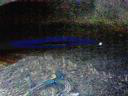

In [29]:
img = open_image('diff/25.jpg')
img

In [38]:
ls

20180704-Benton-hp-n-mobo-c/  20180706-West-lp-n-mobo-c/  diff/


In [0]:
arr_preds = preds.numpy()
df_preds = pd.DataFrame(arr_preds)
df = pd.DataFrame(filename)

In [0]:
df['no_smoke'] = df_preds[0]
df['smoke'] = df_preds[1]
df['label'] = labels

In [0]:
df.rename(columns={0: "path"}, inplace=True)

In [0]:
df['path'] = df['path'].astype('str')
df['filename'] = df.path.str.extract(r'diff/(.*).jpg', expand=True)
df['filename'] = df['filename'].astype('int')

In [0]:
left_join = pd.merge(df, combinations, how='left', left_on='filename', right_on='new_name')
left_join.sort_values(by='filename', ascending=1, inplace=True)

In [36]:
left_join.head(50)

,path,no_smoke,smoke,label,filename,image1,image2,new_name
991,diff/0.jpg,0.999958,4.246809e-05,0,0,1530737845_-01200.jpg,1530737905_-01140.jpg,0
1488,diff/1.jpg,0.998762,1.237939e-03,0,1,1530737845_-01200.jpg,1530737965_-01080.jpg,1
1214,diff/2.jpg,0.999250,7.496615e-04,0,2,1530737845_-01200.jpg,1530738025_-01020.jpg,2
1276,diff/3.jpg,0.999662,3.381167e-04,0,3,1530737845_-01200.jpg,1530738085_-00960.jpg,3
513,diff/4.jpg,0.999088,9.121791e-04,0,4,1530737845_-01200.jpg,1530738145_-00900.jpg,4
1271,diff/5.jpg,0.999824,1.763031e-04,0,5,1530737845_-01200.jpg,1530738205_-00840.jpg,5
533,diff/6.jpg,0.999999,8.031486e-07,0,6,1530737845_-01200.jpg,1530738265_-00780.jpg,6
534,diff/7.jpg,0.999985,1.522784e-05,0,7,1530737845_-01200.jpg,1530738325_-00720.jpg,7
1145,diff/8.jpg,0.999967,3.278896e-05,0,8,1530737845_-01200.jpg,1530738385_-00660.jpg,8
704,diff/9.jpg,0.999940,6.045087e-05,0,9,1530737845_-01200.jpg,1530738445_-00600.jpg,9


In [0]:
left_join.to_csv("/content/gdrive/My Drive/fastai/wildfires/stage-3-unfreezed/results1.csv")